In [35]:
# Mainly for classification of two groups
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Data Generation
mean0 = np.array([1,1])
mean1 = np.array([3,3])
cov0 = np.array([[1.2,0.4],[0.4,0.8]])
cov1 = np.array([[0.8,-0.4],[-0.4,1]])


In [37]:
dist0 = np.random.multivariate_normal(mean0, cov0, 500)
dist1 = np.random.multivariate_normal(mean1, cov1, 500)

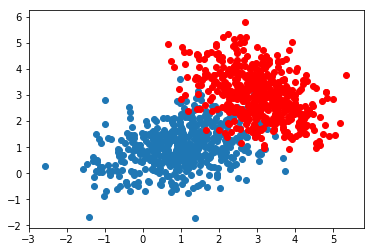

In [38]:
plt.figure()
plt.scatter(dist0[:,0],dist0[:,1])
plt.scatter(dist1[:,0],dist1[:,1],color='red')

In [39]:
data = np.zeros([1000,3])

In [40]:
data[:500,:2] = dist0
# No need its by default 0   -> data[:500,2] = 0
data[500:,:2] = dist1
data[500:,2] = 1

In [41]:
print(data[995:])

[[3.07727134 2.34166652 1.        ]
 [3.81122236 2.1596545  1.        ]
 [1.46331349 3.65913919 1.        ]
 [3.07609876 3.02555371 1.        ]
 [3.40476554 3.56334006 1.        ]]


In [42]:
np.random.shuffle(data)

In [43]:
print(data[995:])

[[ 2.96944368  2.07095483  1.        ]
 [ 3.40568264  2.57322719  1.        ]
 [ 1.26310004  1.02988787  0.        ]
 [ 0.51458171 -0.25839297  0.        ]
 [ 4.71740974  2.79197598  1.        ]]


In [44]:
split = int(data.shape[0]*0.8)
X_train = data[:split,:2]
Y_train = data[:split,2]
X_test = data[split:,:2]
Y_test = data[split:,2]

In [45]:
class LogisticRegression:
    
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.N ,self.dim = X.shape[0],X.shape[1]
        self.coef = np.random.uniform(low=-1,high=-1,size=(self.dim , ))
        self.intercept = np.random.random()
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def hypothesis(self, x):
        return self.sigmoid(self.coef.dot(x) + self.intercept)
    
    def apply_gradient_descent(self,learning_rate = 0.1):
        
        gradients = np.zeros_like(self.coef)
        grad00 = 0
        
        # Get Predictions
        yhat = self.getPredictions(self.X)
        
        #for all examples calculate gradients
        for i in range(self.N):
            gradients += (self.hypothesis(self.X[i]) - self.Y[i]) * self.X[i]
            grad00 += (self.hypothesis(self.X[i]) - self.Y[i])
            
        #Update weights 
        self.coef -= learning_rate * gradients
        self.intercept -= learning_rate * grad00
            
    
    def compute_loss(self):
        log_likelihood = 0
        #  L = ylog(hx) + (1-y)(log(1-hx))
        
        for x,y in zip(self.X,self.Y):
            log_likelihood += ((y* np.log(self.hypothesis(x) + 1e-03)) + \
                    (1 - y)*(np.log(1-self.hypothesis(x) + 1e-03)))
            
            neg_log_loss = -log_likelihood / self.N
            return neg_log_loss
        
    
    def getPredictions(self,test_data):
        yhat = []
        for x in test_data:
            yhat.append(self.predict(x))
            
        self.yhat = np.array(yhat)
        return yhat
    
    
    def predict(self,x):
        hx = self.hypothesis(x)
        if hx >= 0.5:
            return 1
        else:
            return 0
        
    def accuracy(self, test_data, y_actual):
        yhat = self.getPredictions(test_data)
        
        
        return (yhat == y_actual).sum() / test_data.shape[0]
    
    def run(self, losses, iterations=1):
        losses = []
        for _ in range(iterations):
            losses.append(self.compute_loss())
            self.apply_gradient_descent()
        print(losses[:10])
        return losses
        
    

In [46]:
reg = LogisticRegression(X_train,Y_train)

In [47]:
#Randomly picking up will give around 50% accuracy
print("Accuracy before:",reg.accuracy(X_test,Y_test))

Accuracy before: 0.385


In [48]:
losses = reg.compute_loss()

In [49]:
losses

0.006969641079917745

In [50]:

def draw_decision_boundary():
    plt.figure()
    plt.scatter(dist0[:, 0], dist0[:, 1], color='red')
    plt.scatter(dist1[:, 0], dist1[:, 1], color='green')
    x = np.array([-4, 5])
    y = -(reg.coef[0] * x + reg.intercept)/reg.coef[1]
    plt.plot(x,y, 'k')
    plt.title("Decision Boundary")
    plt.show()


[0.006969641079917745, -1.249375416354279e-06, -1.249375416354279e-06, -1.249375416354279e-06, 0.00863469409872767, -1.249375416354279e-06, -1.249375416354279e-06, -1.249375416354279e-06, 0.008634466242465198, -1.249375416354279e-06]
ACCURACY: 0.935


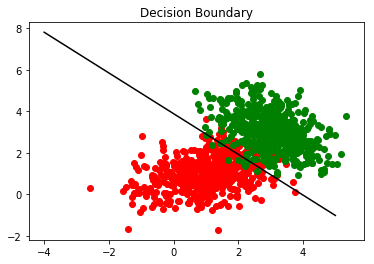

In [51]:
losses = reg.run(losses,iterations=100)
print("ACCURACY:",reg.accuracy(X_test,Y_test))
draw_decision_boundary()

In [52]:
reg.yhat.shape

(200,)

In [53]:
X_train.shape

(800, 2)